# N3XX 프로젝트 : 수화 데이터를 이용한 모델 만들기

수도 없이 많은 사람들이 수화를 사용하며 입대신 본인의 의사를 표현하고 있습니다. 현재는 그 수화를 하는 사람들이 직접 수화로 다른 사람에게 표현할 때, 대부분의 경우 수화를 볼 수가 없다는게 가장 큰 문제입니다. 그래서 만들고자 하는 것은 딥러닝으로 수화의 이미지를 이용해서 텍스트로 수화 이미지로 변환하는 방식을 생각하게 되었습니다.

이번 프로젝트를 통해, 수화를 사용하는 사람들이 다른 사람들과 의사소통할 때 보다 쉽게 의사를 전달할 수 있도록 돕고자 합니다. 특히나, 현재는 코로나19로 인해 비대면 상황이 증가하면서 온라인으로 의사소통을 해야 하는 경우가 많아졌습니다. 이에 따라 수화 이미지를 텍스트로 변환할 수 있는 모델이 있다면, 수화를 사용하는 사람들이 온라인으로도 쉽게 의사소통을 할 수 있게 됩니다.

또한, 이 프로젝트를 통해 수화에 대한 인식도 높일 수 있습니다. 수화를 사용하는 사람들은 일상생활에서 자신의 의사를 전달하기 위해 노력하고 있지만, 비수화자들은 수화를 이해하지 못하고 놓치는 경우가 많습니다. 이번 프로젝트를 통해 수화에 대한 인식이 높아지면, 수화를 사용하는 사람들과 비수화자들 간의 의사소통이 더욱 원활하게 이루어질 것입니다.

그래서 처음이자 마지막인 궁극적인 가설은 "이미지를 수화로 해석 할 수 있는가?"였습니다. 딥러닝 모델을 학습시키고, 텍스트를 입력하면 해당하는 수화 이미지를 출력하는 모델을 구현할 것입니다. 이 모델을 통해 텍스트로 수화를 표현할 수 있게 되면, 수화를 모르는 사람들도 텍스트를 통해 수화를 이해할 수 있게 될 것입니다. 또한, 수화를 할 수 없는 사람들이 텍스트로 수화를 표현할 수 있게 되면, 수화를 사용하는 사람들과의 의사소통이 보다 원활해질 것입니다. 이를 통해 소외되어 있던 수화를 사용하는 사람들과의 사회적 거리를 줄일 수 있을 것입니다.

# ASL 수화 이미지 분석

먼저 ASL 수화 이미지 데이터셋을 이용하여 딥러닝 모델을 학습해야 합니다. 그리고나서 학습된 모델을 이용하여 이미지로부터 수화를 해석하는 코드를 작성하고자 합니다.

사용한 데이터셋은 [캐글에 있는 ASL 수화 이미지 셋](https://www.kaggle.com/datasets/jeyasrisenthil/hand-signs-asl-hand-sign-data)을 사용했습니다.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [2]:
# 데이터 경로 설정
data_path = "/content/drive/MyDrive/DATASET"

In [3]:
# 클래스 라벨 설정
classes = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 0 1 2 3 4 5 6 7 8 9".split()

# 이미지 크기 설정
img_size = 300

In [4]:
# 이미지 데이터와 라벨 데이터를 읽어옵니다.
def load_data(data_path):
    data = []
    labels = []
    for category in classes:
        path = os.path.join(data_path, category)
        label = classes.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(label)
    return np.array(data), np.array(labels)

In [5]:
# 데이터를 읽어옵니다.
data, labels = load_data(data_path)

# 라벨 데이터를 One-hot Encoding으로 변환합니다.
labels = to_categorical(labels, num_classes=len(classes))

# 데이터를 Train set과 Test set으로 분리합니다.
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

In [6]:
# 딥러닝 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_data.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

> 모델을 CNN(Convolutional Neural Network)으로 구성했는데 다음과 같은 이유가 있습니다.
> - 이 모델은 Conv2D, MaxPooling2D, Flatten, Dense의 레이어로 이뤄져있습니다.
> - 수화를 위한 따로 만들어진 모델을 찾지 못했습니다. 따라서 미리 훈련된 모델을 쓸 수가 없었습니다.
> - ResNet50v2같은 좋은 모델이 있긴하지만, ResNet50v2처럼 대규모 이미지 데이터셋을 사용하는 환경이 아닐 뿐더러 비교적 작은 이미지 데이터를 사용하고, 진행하기 때문에 CNN으로 구성했습니다.

In [7]:
# 모델 요약 정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 322624)            0

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_check = ModelCheckpoint('best_model.h5', save_best_only=True)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백 정의
model_check = ModelCheckpoint('best_model.h5', save_best_only=True)

In [10]:
# 모델 학습
history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), 
                    callbacks=[early_stop, model_check])

Epoch 1/20
23/23 [==============================] - 191s 8s/step - loss: 673.0208 - accuracy: 0.1500 - val_loss: 2.4211 - val_accuracy: 0.4556
Epoch 2/20
23/23 [==============================] - 175s 8s/step - loss: 1.0396 - accuracy: 0.7667 - val_loss: 1.3481 - val_accuracy: 0.6611
Epoch 3/20
23/23 [==============================] - 169s 7s/step - loss: 0.1266 - accuracy: 0.9694 - val_loss: 1.4280 - val_accuracy: 0.6722
Epoch 4/20
23/23 [==============================] - 168s 7s/step - loss: 0.0400 - accuracy: 0.9944 - val_loss: 1.7299 - val_accuracy: 0.6222
Epoch 5/20
23/23 [==============================] - 180s 8s/step - loss: 0.0394 - accuracy: 0.9889 - val_loss: 1.9454 - val_accuracy: 0.5944
Epoch 6/20
23/23 [==============================] - 178s 8s/step - loss: 0.0478 - accuracy: 0.9931 - val_loss: 1.8587 - val_accuracy: 0.6389
Epoch 7/20
23/23 [==============================] - 177s 8s/step - loss: 0.5079 - accuracy: 0.9458 - val_loss: 8.2234 - val_accuracy: 0.4389


In [11]:
import tensorflow as tf

# 저장된 모델 가중치 로드
best_model = tf.keras.models.load_model('best_model.h5')

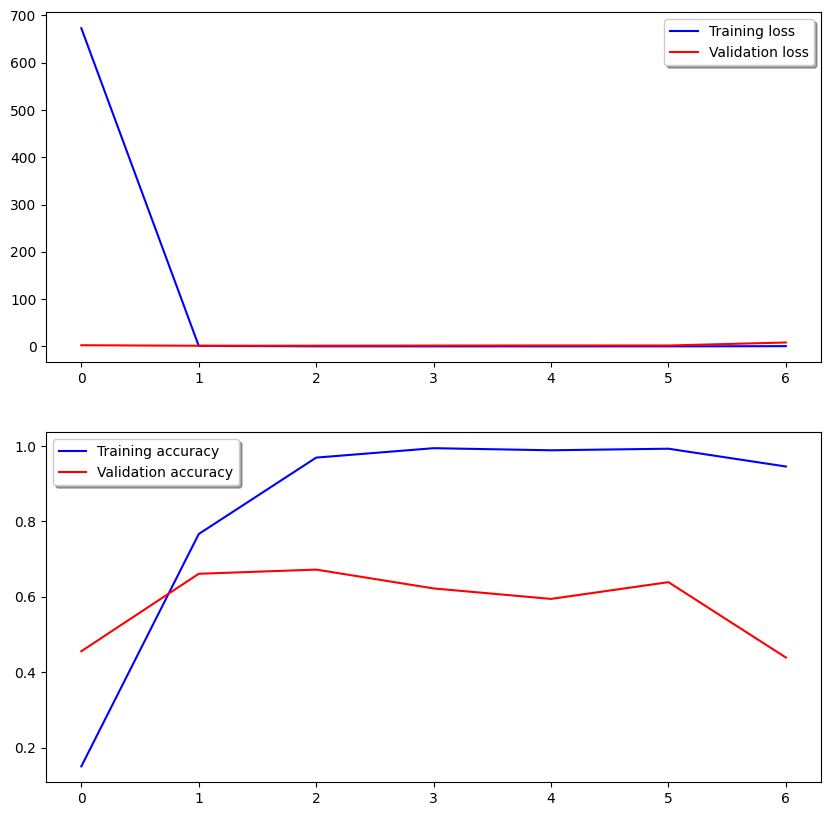

In [12]:
# 모델의 학습 과정에서 발생한 loss와 accuracy 변화를 plot으로 시각화합니다.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

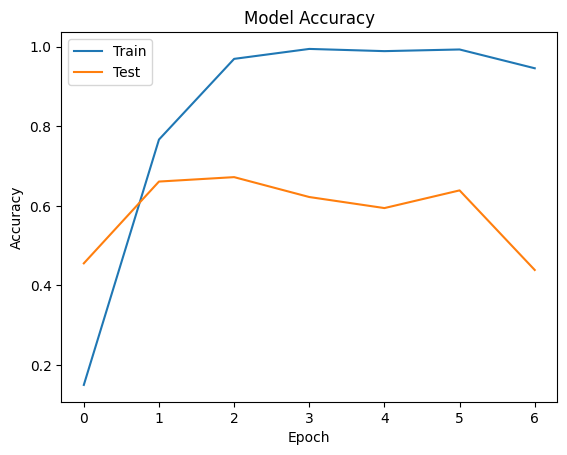

In [13]:
# 학습 과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

---
# 학습된 모델로 표현하기

In [55]:
import cv2
import numpy as np

def text_to_image(text):
    # 이미지 크기 설정
    img_width, img_height = 300, 300
    
    # 텍스트를 이미지로 변환
    img = np.zeros((img_height, img_width, 3), np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(text, font, 1, 2)[0]
    text_x = int((img_width - text_size[0]) / 2)
    text_y = int((img_height + text_size[1]) / 2)
    cv2.putText(img, text, (text_x, text_y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # 이미지를 모델 입력에 맞게 변환
    img = cv2.resize(img, (img_width, img_height))
    img = np.array(img, dtype=np.float32) / 255.0
    img = np.expand_dims(img, axis=0)
    
    return img

In [58]:
def text_to_sign_language(text, model):
    # 텍스트를 이미지로 변환
    img = text_to_image(text)

    # 이미지를 수화 이미지로 변환
    pred = model.predict(img)
    pred = np.squeeze(pred)
    pred = np.argmax(pred, axis=-1)

    # 수화 이미지를 출력 가능한 형태로 변환
    sign_language_img = np.zeros((300, 300, 3), np.uint8)
    sign_language_img[:] = (0, 0, 0)
    cv2.putText(sign_language_img, str(pred), (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), 10)
    sign_language_img = cv2.cvtColor(sign_language_img, cv2.COLOR_BGR2RGB)
    
    return sign_language_img

In [60]:
def resize_image(img):
    """
    이미지를 300x300 크기로 변환합니다.
    """
    return cv2.resize(img, (300, 300))


1/1 [==============================] - 0s 269ms/step


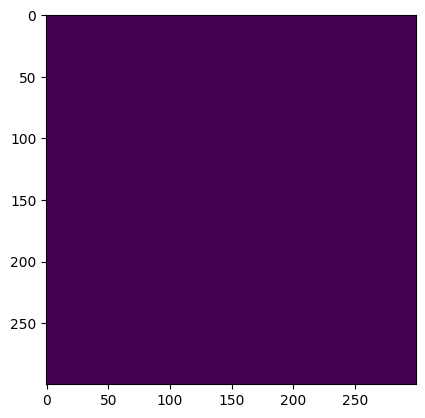

In [61]:
input_text = "B"
sign_language_img = text_to_sign_language("B", best_model)

import matplotlib.pyplot as plt
plt.imshow(resize_image(sign_language_img[0]))
plt.show()

In [63]:
import cv2
import numpy as np

# 이미지 경로
img_path = "/content/drive/MyDrive/(1).jpg"

# 이미지 로드
img = cv2.imread(img_path)

# 이미지 크기 조정
img = cv2.resize(img, (300, 300))

# 이미지 배열 형태 변환
img = np.array(img, dtype=np.float32) / 255.0
img = np.expand_dims(img, axis=0)

# 모델 예측
pred = best_model.predict(img)
pred = np.squeeze(pred)
pred = np.argmax(pred, axis=-1)

print(pred)

1/1 [==============================] - 0s 163ms/step
3


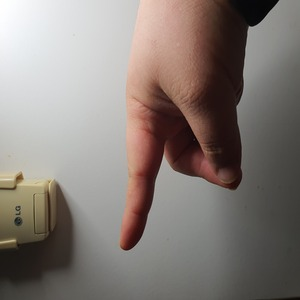